In [1]:
import os
import sys

# print(f"Current Working Directory --> {os.getcwd()}")
#Add one directory above research
parent_dir = os.path.abspath(os.path.join(os.getcwd(), "..")) # Get the parent directory
sys.path.append(parent_dir)
current_working_dir = %pwd

print(f"Parent Dir >>> {parent_dir}")
print(f"Current Working Dir >>> {current_working_dir}")

# from configs import cfgs  # Absolute import

Parent Dir >>> C:\Users\maz\dev\Projects_\alzheimer
Current Working Dir >>> C:\Users\maz\dev\Projects_\alzheimer\research


In [2]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
# warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

#### Imports

In [3]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline

# Custom Functions
from utils import *

#### Paths

In [4]:
# Create a path object
# dataset_dir = cfgs["DATASET_DIR"]
dataset_dir = "..//dataset//modified"
dataset_path = Path(dataset_dir)
print("Dataset Path")
print("*"*12)
print(f"Dataset: {dataset_path}")
print("\n")

# Find all CSV files inside the directory
files = list(dataset_path.glob("*.csv"))

print("Files in Dataset Dir:")
print("*"*21)
for file_path in files:
    print(file_path.name)  # Print only the file name


# Combining multiple paths
# path_metadata = dataset_path / "MetaData.xlsx"
path_train = dataset_path / "train.csv"
path_test = dataset_path / "test.csv"
path_train_cleaned = dataset_path / "train_v01.csv"

print("\n")
print(f"Train File Path --> {path_train}")
print(f"Train File Path | Cleaner Version --> {path_train_cleaned}")
# print("\n")
print(f"Test File Path --> {path_test}")

Dataset Path
************
Dataset: ..\dataset\modified


Files in Dataset Dir:
*********************
test.csv
test_features.csv
test_labels.csv
train.csv
train_features.csv
train_labels.csv
train_without_featEng.csv
train_with_featEng.csv


Train File Path --> ..\dataset\modified\train.csv
Train File Path | Cleaner Version --> ..\dataset\modified\train_v01.csv
Test File Path --> ..\dataset\modified\test.csv


#### Data Loading

In [5]:
# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

In [6]:
try:
    dfTrain = pd.read_csv(path_train, encoding = 'utf8')
    display(dfTrain.head(2))
    print(dfTrain.shape)
except FileNotFoundError:
    print("Error: 'train.csv' not found. Please ensure the file is in the correct location.")
    dfTrain = None

UID  Year  composite_score Age_03 Urban_03                 Married_03  \
0  aard  2021              104  50-59    Urban                    Widowed   
1  abme  2021              106  50-59    Rural  Married or In Civil Union   

   Marriages_03 Education_03 Num_Living_Child_03  Migration_03  ...  \
0           1.0    7-9 Years              1 or 2           0.0  ...   
1           1.0    1-5 Years              5 or 6           0.0  ...   

   Meet_FnF_12  SocialActivities_12  AttendReligiousServices_12  a16a_12  \
0  Once a week                Never                         1.0      NaN   
1        Never                Never                         0.0      NaN   

   YrsLivedInUSA_12  a22_12  a33b_12  SpeaksEnglish_12  HousingEnvironment_12  \
0               NaN     NaN      NaN               0.0               Concrete   
1               NaN     NaN      NaN               0.0               Concrete   

   PredictionYear  
0               9  
1               9  

[2 rows x 185 columns]

(2889, 185)


#### Shape

In [7]:
print(f"In the training data we have " + str(dfTrain.shape[0]) + " rows", str(dfTrain.shape[1]) + " columns")

In the training data we have 2889 rows 185 columns


#### Examine data

In [8]:
#dfTrain.info(verbose=True, show_counts=True)

#### Features Data Type Conversion

- We will convert `Year` data type to category for memory efficiency
- We will convert columns with `object` type to `category` if those have low cardinality
- Also there are some columns whose infered data type is `float64` but actually these are `boolean` type. We will convert them to `Categorical` since `Boolean variables` are categorical by nature (True, False, NA)

![Feature Type](dataTypes.png)

##### - Convert to `Category`

In [9]:
# Get all dtypes as a Series
all_dtypes = dfTrain.dtypes
print("\nAll dtypes (Series):")
print(all_dtypes)
print("-" * 30)

# Get unique dtypes
unique_dtypes = dfTrain.dtypes.unique()
print("\nUnique dtypes (NumPy array of dtype objects):")
print(unique_dtypes)
print("-" * 30)


All dtypes (Series):
UID                       object
Year                       int64
composite_score            int64
Age_03                    object
Urban_03                  object
                          ...   
a22_12                    object
a33b_12                   object
SpeaksEnglish_12         float64
HousingEnvironment_12     object
PredictionYear             int64
Length: 185, dtype: object
------------------------------

Unique dtypes (NumPy array of dtype objects):
[dtype('O') dtype('int64') dtype('float64')]
------------------------------


In [10]:
# print("*" * 44)
# print(f"Converting `object` data types to `Category`")
# print("*" * 44)

# # Convert to 'Year ' Column to category
# df['Year'] = df['Year'].astype('category')

# # Convert `Object` data type to Category. Since reading from .csv pandas don't infer them automatically as `Category`
# df, converted_columns_train = identify_and_convert_object_to_category(df, threshold_ratio=0.1, max_unique=50)

# print("\n--- After Conversion ---")
# print("Examine Converted DataFrame dtypes:")
# print(df.dtypes)
# print("\nColumns converted to 'category':", converted_columns_train, "\n")

# # Check the categories in a converted column
# if 'Age_Group' in converted_columns_train:
#     print(f"\nCategories in 'Age_Group' column: {df['Age_Group'].cat.categories.tolist()}")
# if 'Urban_Status' in converted_columns_train:
#     print(f"Categories in 'Urban_Status' column: {df['Urban_Status'].cat.categories.tolist()}")

# print("*" * 65)
# print(f"Converting `Float` data types that have `0` and `1` to `Category`")
# print("*" * 65)
# # Convert Boolean to Category
# df, cat_cols = convert_float_to_bool(df)
# df, bool_cols = convert_boolean_to_category(df)

In [11]:
# --- Define the Pipeline ---
# Note: The order matters if transformations depend on previous ones,
# though in this case, they mostly operate on distinct initial dtypes.

print("*" * 80)
data_type_conversion_pipeline = Pipeline([
    ('specific_categorizer', SpecificColumnCategorizer(columns_to_categorize=['Year'])),
    ('object_to_category', ObjectToCategoryTransformer(threshold_ratio=0.1, max_unique=50)), # Adjusted threshold for sample
    ('float_to_category', FloatToCategoryTransformer()),
    # ('bool_to_category', BooleanToCategoryTransformer())
])
print(f"PipeLine | Data Types Conversion: {data_type_conversion_pipeline}")
print("*" * 80)

********************************************************************************
PipeLine | Data Types Conversion: Pipeline(steps=[('specific_categorizer',
                 SpecificColumnCategorizer(columns_to_categorize=['Year'])),
                ('object_to_category', ObjectToCategoryTransformer()),
                ('float_to_category', FloatToCategoryTransformer())])
********************************************************************************


In [12]:
%%capture
# --- Apply the Pipeline ---
print("*" * 49)
print("--- Applying Pipeline | Data Types Conversion ---")
print("*" * 49)

df = data_type_conversion_pipeline.fit_transform(dfTrain)

In [13]:
print(f"--- PipeLine Completed ---")

--- PipeLine Completed ---


In [14]:
print("*" * 30)
print("After Conversion of Data Types")
print("*" * 30)
# Get all dtypes as a Series
all_dtypes = df.dtypes
print("-" * 20)
print("All dtypes (Series):")
print("-" * 20)
print(f"All Data Types -> {all_dtypes}")

# Get unique dtypes
unique_dtypes = df.dtypes.unique()
print("-" * 45)
print("Unique dtypes (NumPy array of dtype objects):")
print("-" * 45)
print(f"Unique Data Types -> {unique_dtypes}")

******************************
After Conversion of Data Types
******************************
--------------------
All dtypes (Series):
--------------------
All Data Types -> UID                        object
Year                     category
composite_score             int64
Age_03                   category
Urban_03                 category
                           ...   
a22_12                   category
a33b_12                  category
SpeaksEnglish_12         category
HousingEnvironment_12    category
PredictionYear              int64
Length: 185, dtype: object
---------------------------------------------
Unique dtypes (NumPy array of dtype objects):
---------------------------------------------
Unique Data Types -> [dtype('O')
 CategoricalDtype(categories=[2016, 2021], ordered=False, categories_dtype=int64)
 dtype('int64')
 CategoricalDtype(categories=['49 or younger', '50-59', '60-69', '70-79', '80+'], ordered=False, categories_dtype=object)
 CategoricalDtype(categories=['Rur

In [15]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 185 columns):
 #    Column                      Non-Null Count  Dtype   
---   ------                      --------------  -----   
 0    UID                         2889 non-null   object  
 1    Year                        2889 non-null   category
 2    composite_score             2889 non-null   int64   
 3    Age_03                      2887 non-null   category
 4    Urban_03                    2889 non-null   category
 5    Married_03                  2889 non-null   category
 6    Marriages_03                2861 non-null   float64 
 7    Education_03                2875 non-null   category
 8    Num_Living_Child_03         2872 non-null   category
 9    Migration_03                2887 non-null   category
 10   GlobalHealth_03             2721 non-null   category
 11   ADL_Dress_03                2722 non-null   category
 12   ADL_Walk_03                 2880 non-null   category
 13   A

#### Descriptive statistics for numerical features

In [16]:
print("*" * 46)
print("Descriptive Statistics for Numerical Features:")
print("*" * 46)
print("\n")

display(df.describe())

**********************************************
Descriptive Statistics for Numerical Features:
**********************************************




composite_score  Marriages_03   Num_ADL_03  Num_IADL_03  \
count      2889.000000   2861.000000  2878.000000  2722.000000   
mean        146.141918      1.126879     0.070883     0.045555   
std          59.078730      0.469691     0.402262     0.285861   
min           8.000000      0.000000     0.000000     0.000000   
25%         105.000000      1.000000     0.000000     0.000000   
50%         146.000000      1.000000     0.000000     0.000000   
75%         186.000000      1.000000     0.000000     0.000000   
max         334.000000      5.000000     5.000000     4.000000   

       Num_CES-D_Symptoms_03  Num_Illnesses_03  Marriages_12   Num_ADL_12  \
count            2715.000000       2887.000000   2749.000000  2763.000000   
mean                3.479190          0.971943      1.197890     0.212450   
std                 2.648645          0.956563      0.611733     0.665236   
min                 0.000000          0.000000      0.000000     0.000000   
25%                 1.000000          0.000000      1.000000     0.000000   
50%                 3.000000          1.000000      1.000000     0.000000   
75%                 5.000000          2.000000      1.000000     0.000000   
max                 9.000000          5.000000      7.000000     5.000000   

       Num_IADL_12  Num_CES-D_Symptoms_12  ...    hincome_12  \
count  2680.000000            2660.000000  ...  2.752000e+03   
mean      0.143657               3.366917  ...  8.166788e+04   
std       0.478618               2.624120  ...  7.197490e+05   
min       0.000000               0.000000  ... -1.900000e+05   
25%       0.000000               1.000000  ...  0.000000e+00   
50%       0.000000               3.000000  ...  2.000000e+04   
75%       0.000000               5.000000  ...  6.000000e+04   
max       4.000000               9.000000  ...  3.602000e+07   

       hinc_business_12  hinc_rent_12  hinc_assets_12   hinc_cap_12  \
count      2.782000e+03  2.782000e+03     2782.000000  2.782000e+03   
mean       2.999641e+04  6.470165e+02      833.932423  3.147376e+04   
std        6.912140e+05  2.812897e+04    11193.041142  6.918793e+05   
min        0.000000e+00 -2.100000e+05        0.000000 -2.100000e+05   
25%        0.000000e+00  0.000000e+00        0.000000  0.000000e+00   
50%        0.000000e+00  0.000000e+00        0.000000  0.000000e+00   
75%        0.000000e+00  0.000000e+00        0.000000  0.000000e+00   
max        3.600000e+07  1.200000e+06   360000.000000  3.600000e+07   

          Pension_12  SpousePension_12      a16a_12  YrsLivedInUSA_12  \
count    2782.000000      1.778000e+03    33.000000         53.000000   
mean    15920.201294      1.513498e+04  1973.848485          7.490566   
std     46219.907592      5.433393e+04    18.246783         11.943171   
min         0.000000      0.000000e+00  1942.000000          1.000000   
25%         0.000000      0.000000e+00  1960.000000          1.000000   
50%         0.000000      0.000000e+00  1970.000000          3.000000   
75%     20000.000000      0.000000e+00  1987.000000          7.000000   
max    960000.000000      1.200000e+06  2012.000000         52.000000   

       PredictionYear  
count     2889.000000  
mean         7.243337  
std          2.387346  
min          4.000000  
25%          4.000000  
50%          9.000000  
75%          9.000000  
max          9.000000  

[8 rows x 36 columns]

#### Examine Categorical Features (for Year 2003 and 2012)

In [17]:
cols = categorize_columns_by_suffix(df)
cols_03 = cols['cols_03']
cols_12 = cols['cols_12']
cols_rest = cols['cols_rest']
cols_rest.remove("UID")

##### - Categorical features in columns with suffix `_03`

--- Plotting Categorical Distributions (Grid Layout) ---
Number of valid columns: 58


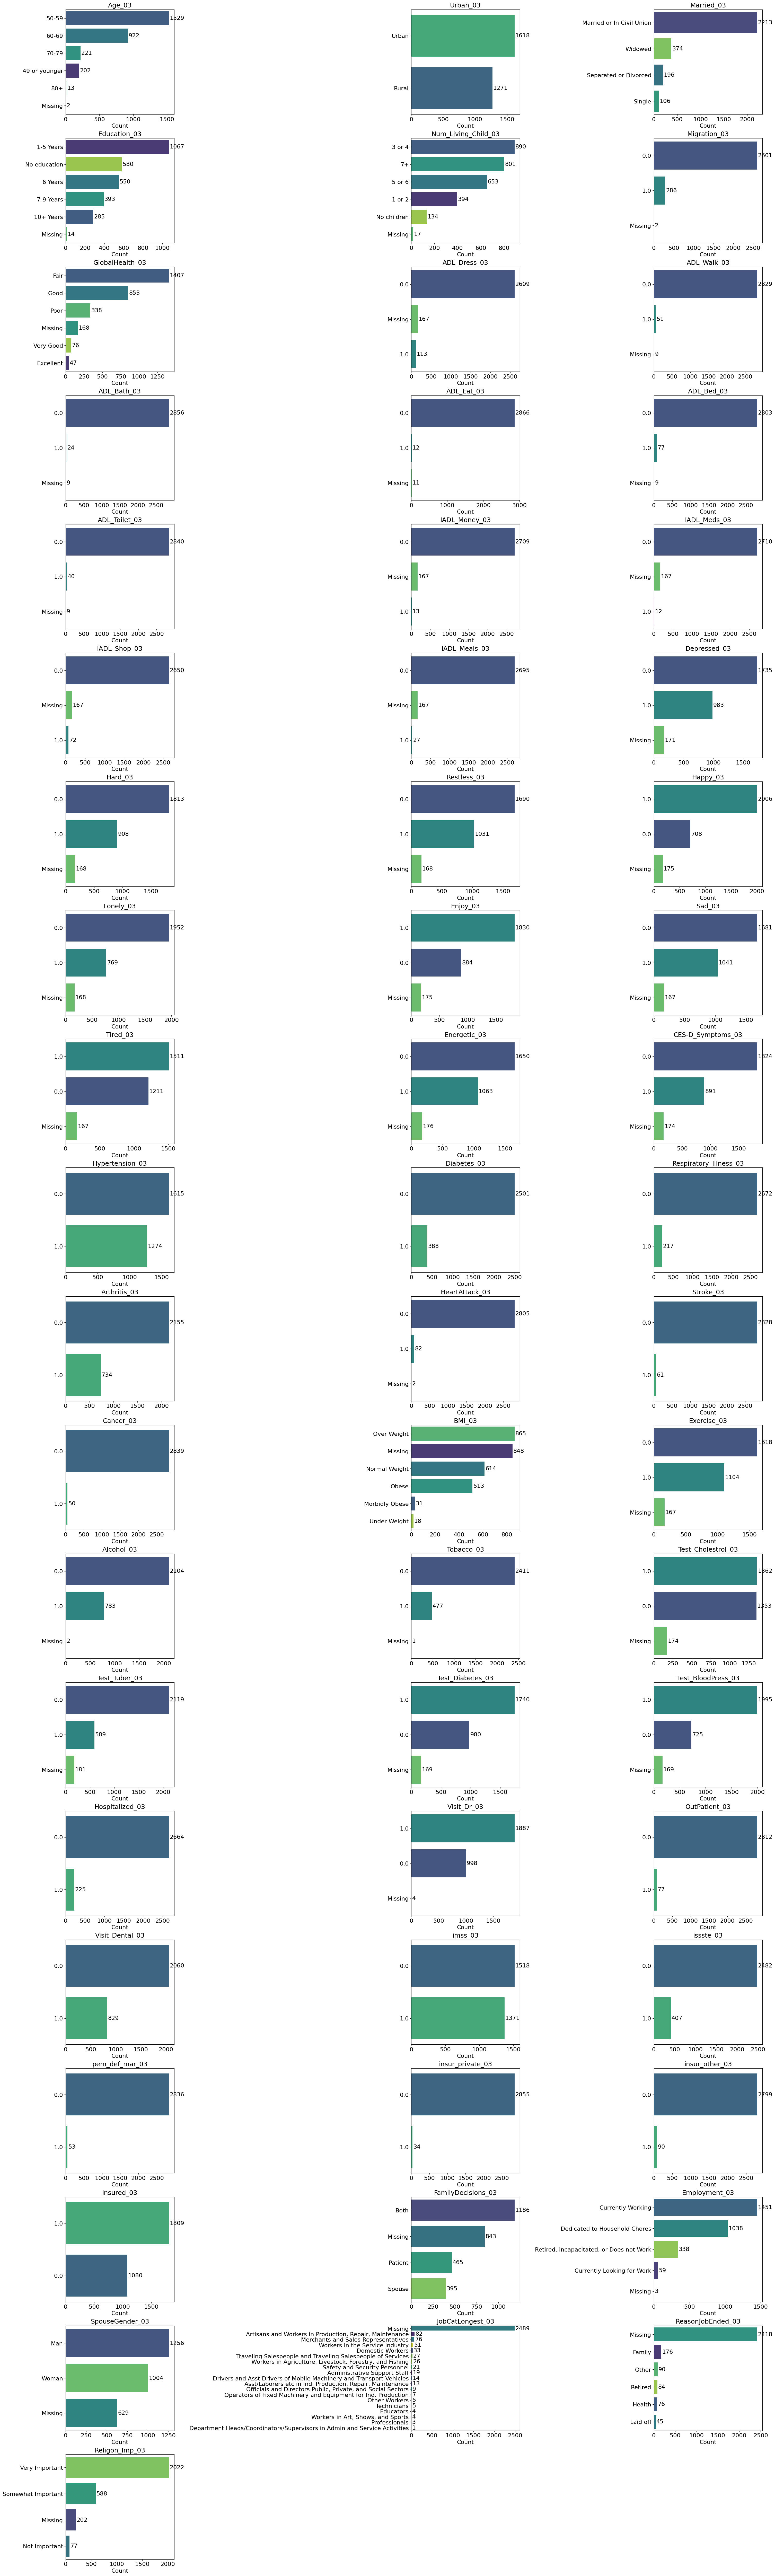

In [18]:
# Get the `_03` suffix columns
cat_cols_03 = df[cols_03].select_dtypes(include=['object', 'category']).columns.to_list()

# # Now Check for Unique Values and Counts
# print("*" * 80)
# print("Unique Values and Counts for Categorical Features in Columns with Suffix '_03'")
# print("*" * 80)
# for col in cat_cols_03:
#     print(f"\nColumn: {col}")
#     print("*" * 30)
#     display(df_cat_03[col].value_counts())

####  Plot in Seaborn ####
pd.set_option('future.no_silent_downcasting', True)
plot_categorical_distributions_grid(df, cat_cols_03, n_cols=3, figsize_per_plot=(10, 5), title_fontsize=18, axis_labelsize=16, tick_fontsize=16)

#### Plot in Plotly #### 
# plot_categorical_distributions_plotly(df, cat_cols_03, width=900, height=450)

##### - Categorical features in columns with suffix `_12`

--- Plotting Categorical Distributions (Grid Layout) ---
Number of valid columns: 86


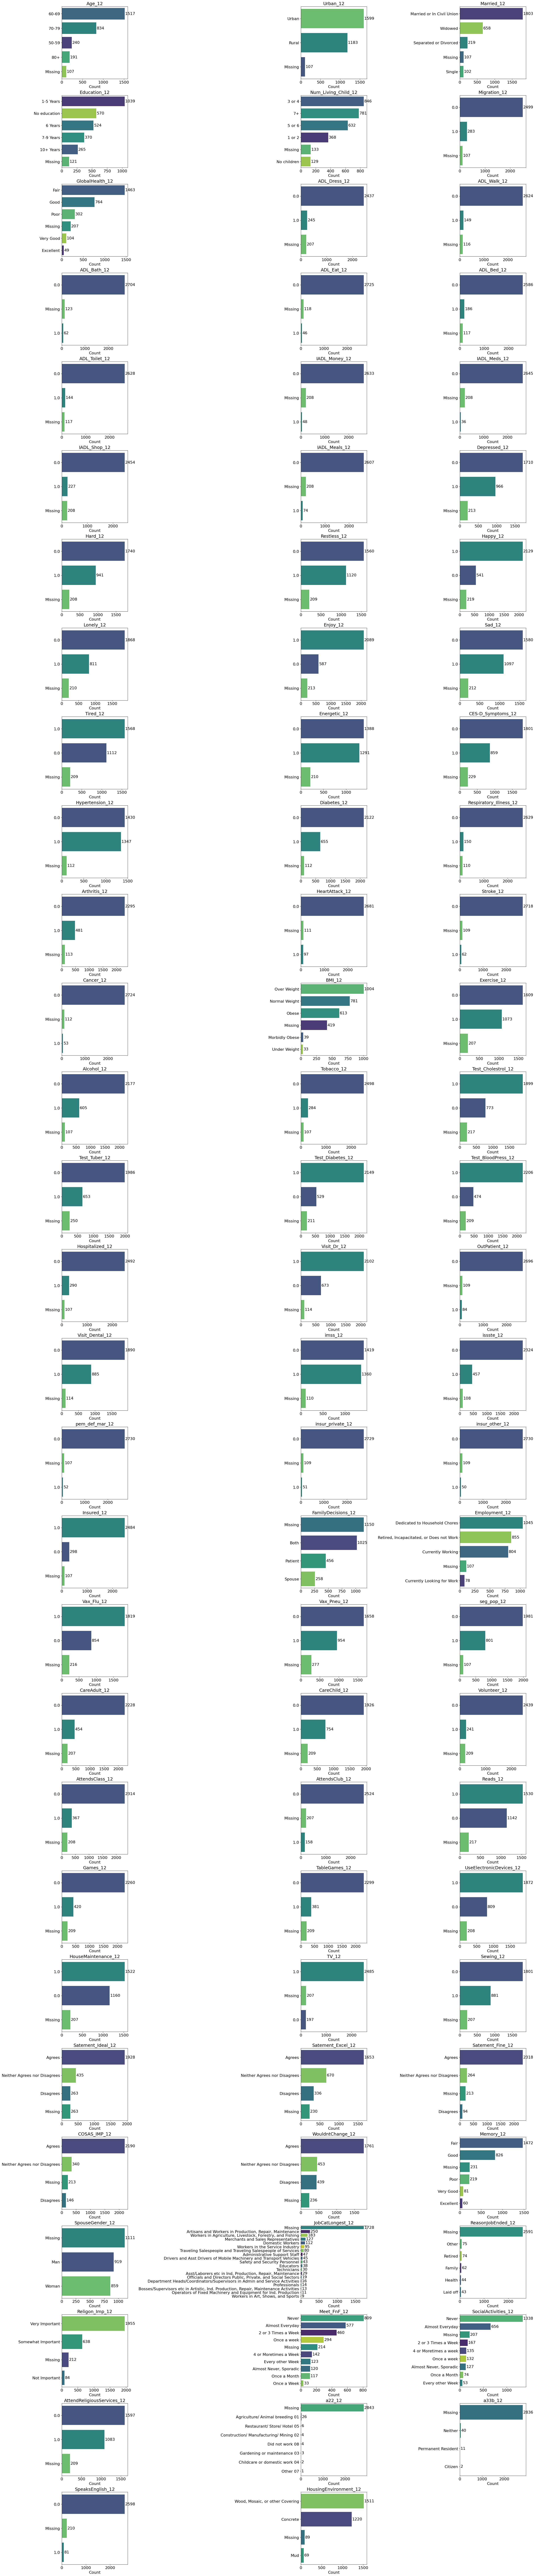

In [19]:
# Get the `_12` suffix columns
cat_cols_12 = df[cols_12].select_dtypes(include=['object', 'category']).columns.to_list()

#### Plot in Seaborn ####
pd.set_option('future.no_silent_downcasting', True)
plot_categorical_distributions_grid(df, cat_cols_12, n_cols=3, figsize_per_plot=(10, 5), title_fontsize=18, axis_labelsize=16, tick_fontsize=16)

#### Plot in Plotly ####
# plot_categorical_distributions_plotly(df_cat_12, cat_cols_12, width=800, height=400)

#### - Categorical features in rest of the columns

--- Plotting Categorical Distributions (Grid Layout) ---
Number of valid columns: 4


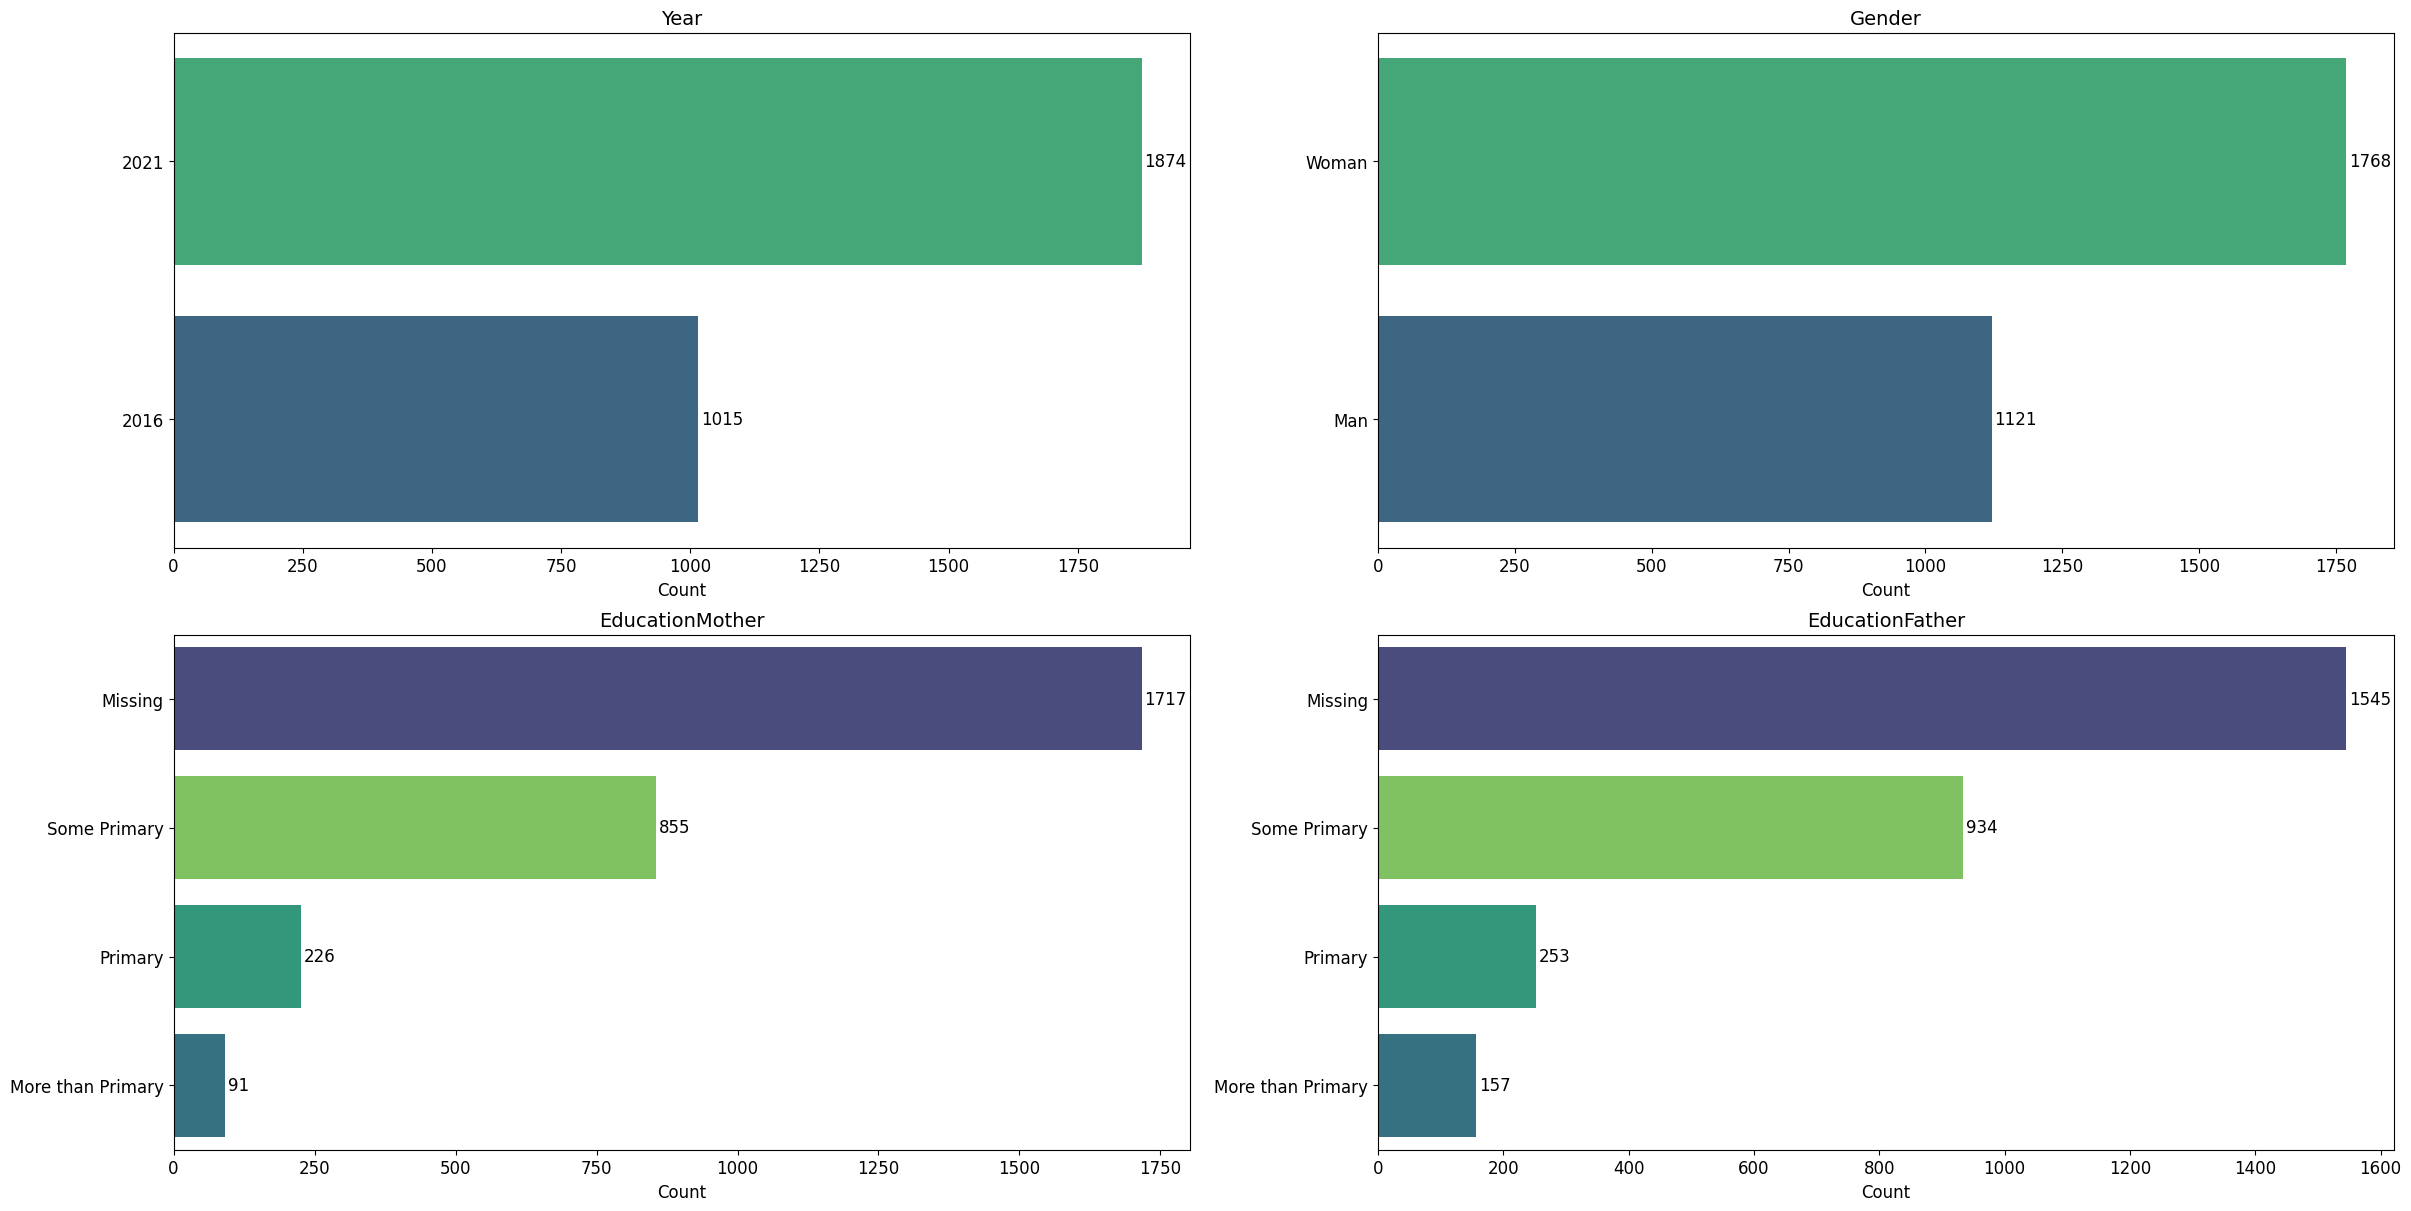

In [20]:
# Get the category columns besides columns with suffix  `_03` and `_12`
cat_cols_rest = df[cols_rest].select_dtypes(include=['object', 'category']).columns.to_list()

####  Plot in Seaborn ####
pd.set_option('future.no_silent_downcasting', True)
plot_categorical_distributions_grid(df[cols_rest], cat_cols_rest, n_cols=2, figsize_per_plot=(12, 6), 
                                    title_fontsize=14, axis_labelsize=12, tick_fontsize=12)

#### Plot in Plotly #### 
# plot_categorical_distributions_plotly(df[cols_rest], cat_cols_rest, width=900, height=450)

#### Examine Numerical Features (For Year 2003 & 2012)

##### - Numerical Features in columns with suffix `_03`


Plotting histograms...Total plots: 16



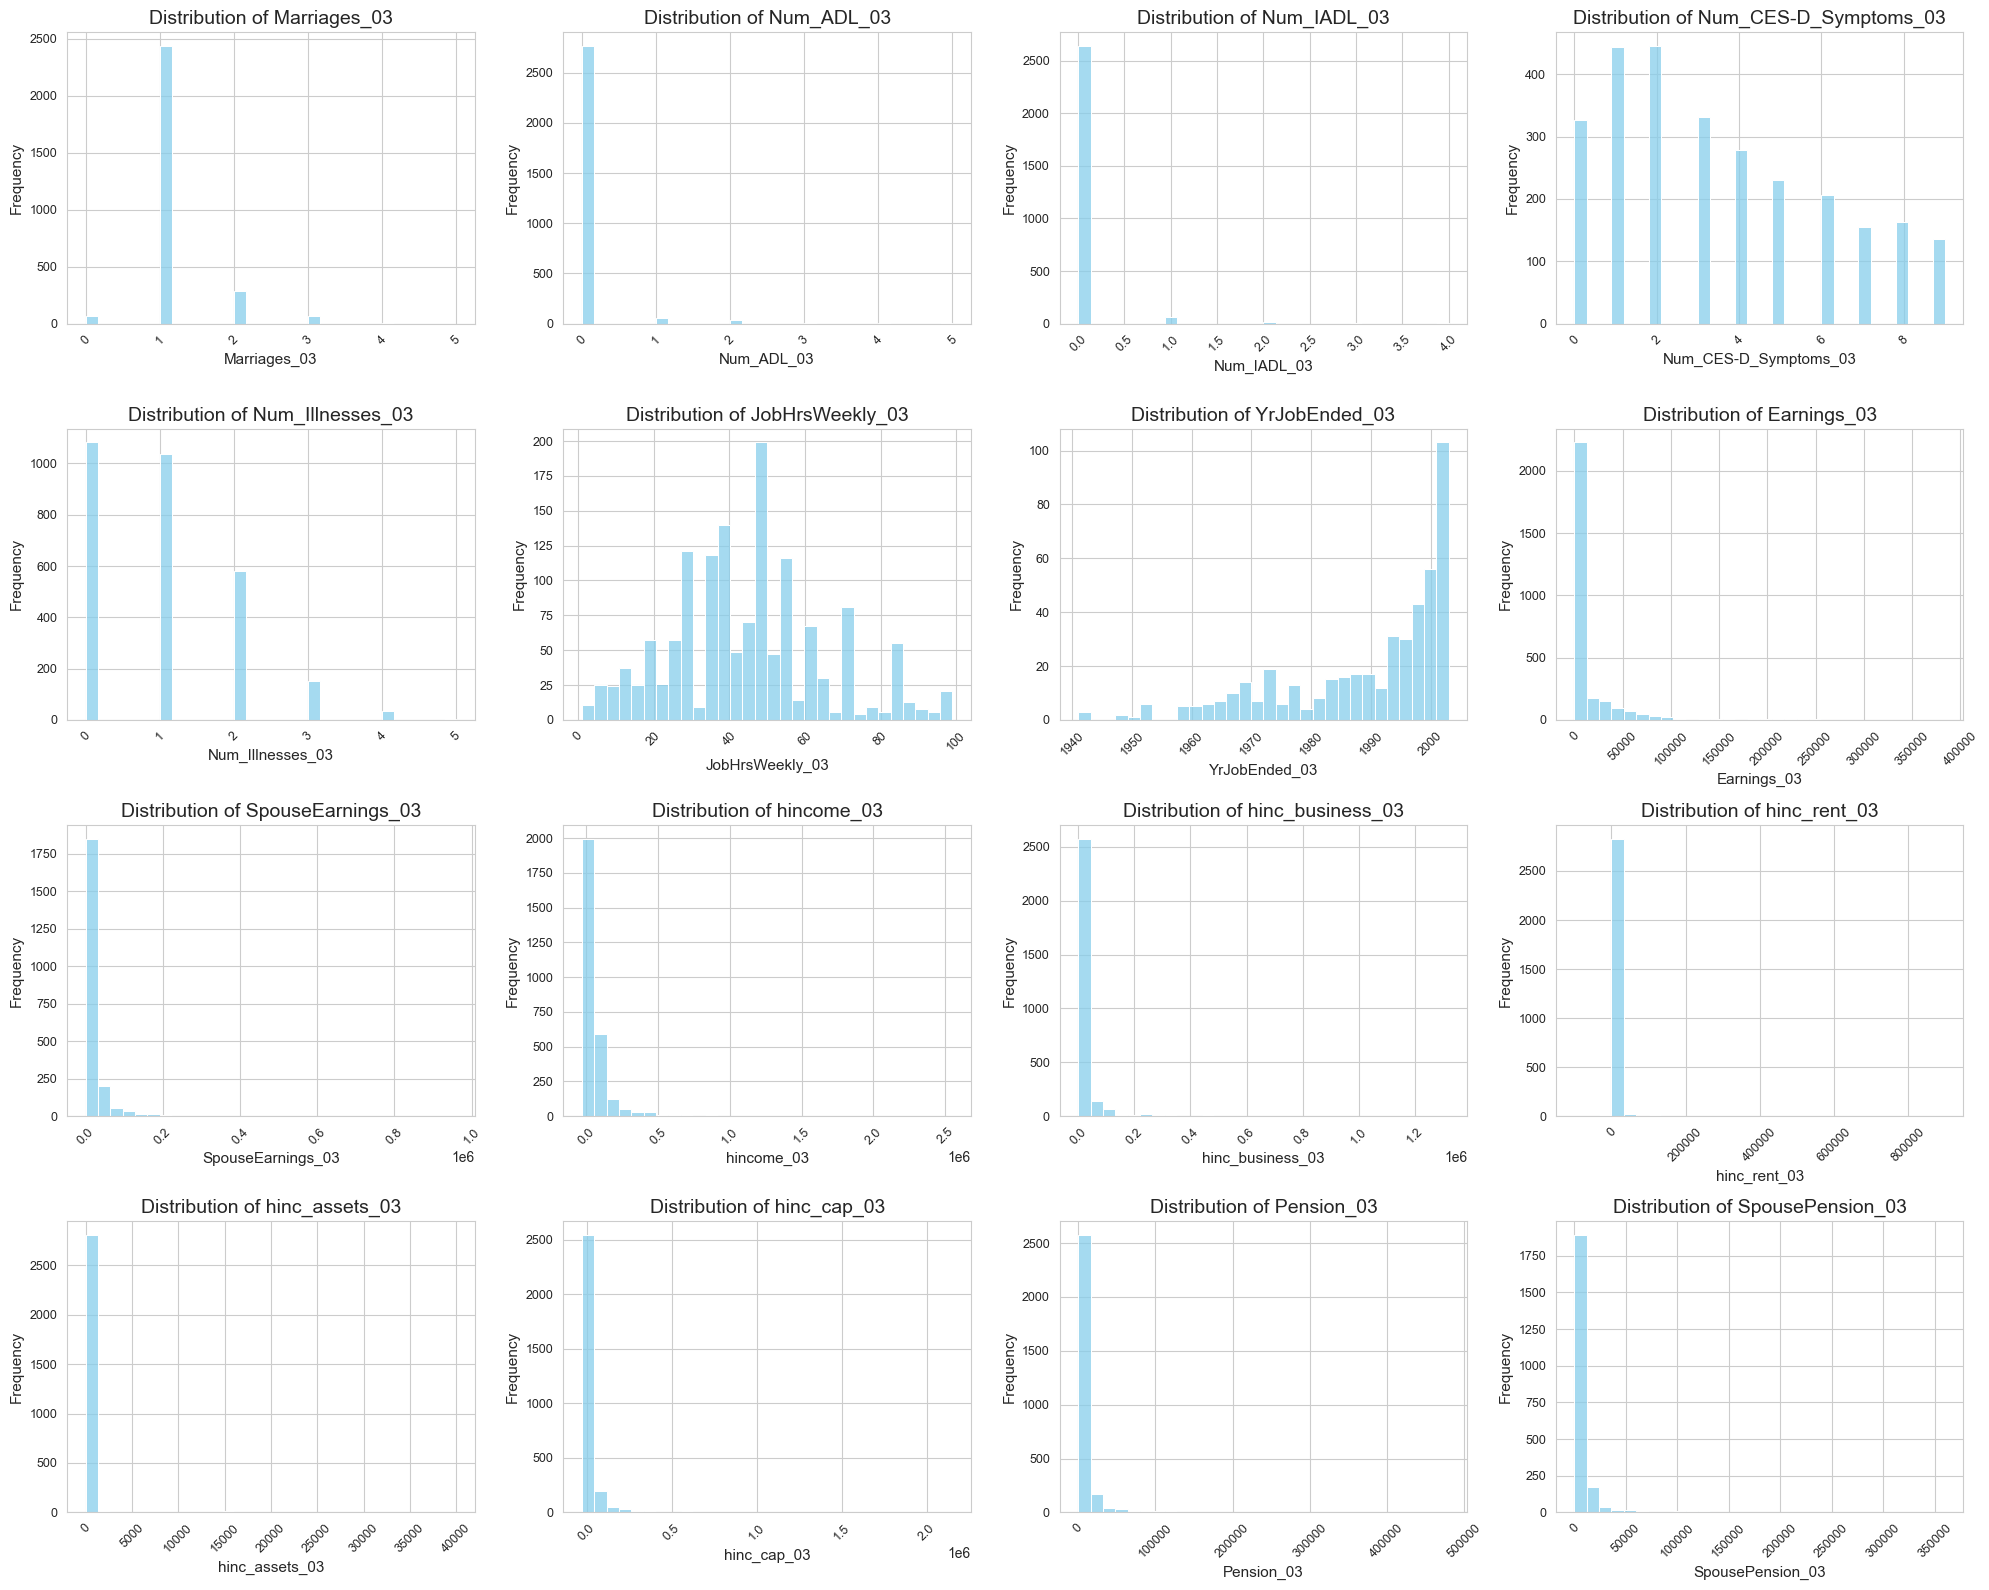


Plotting Violin Plots...Number of Plots: 16



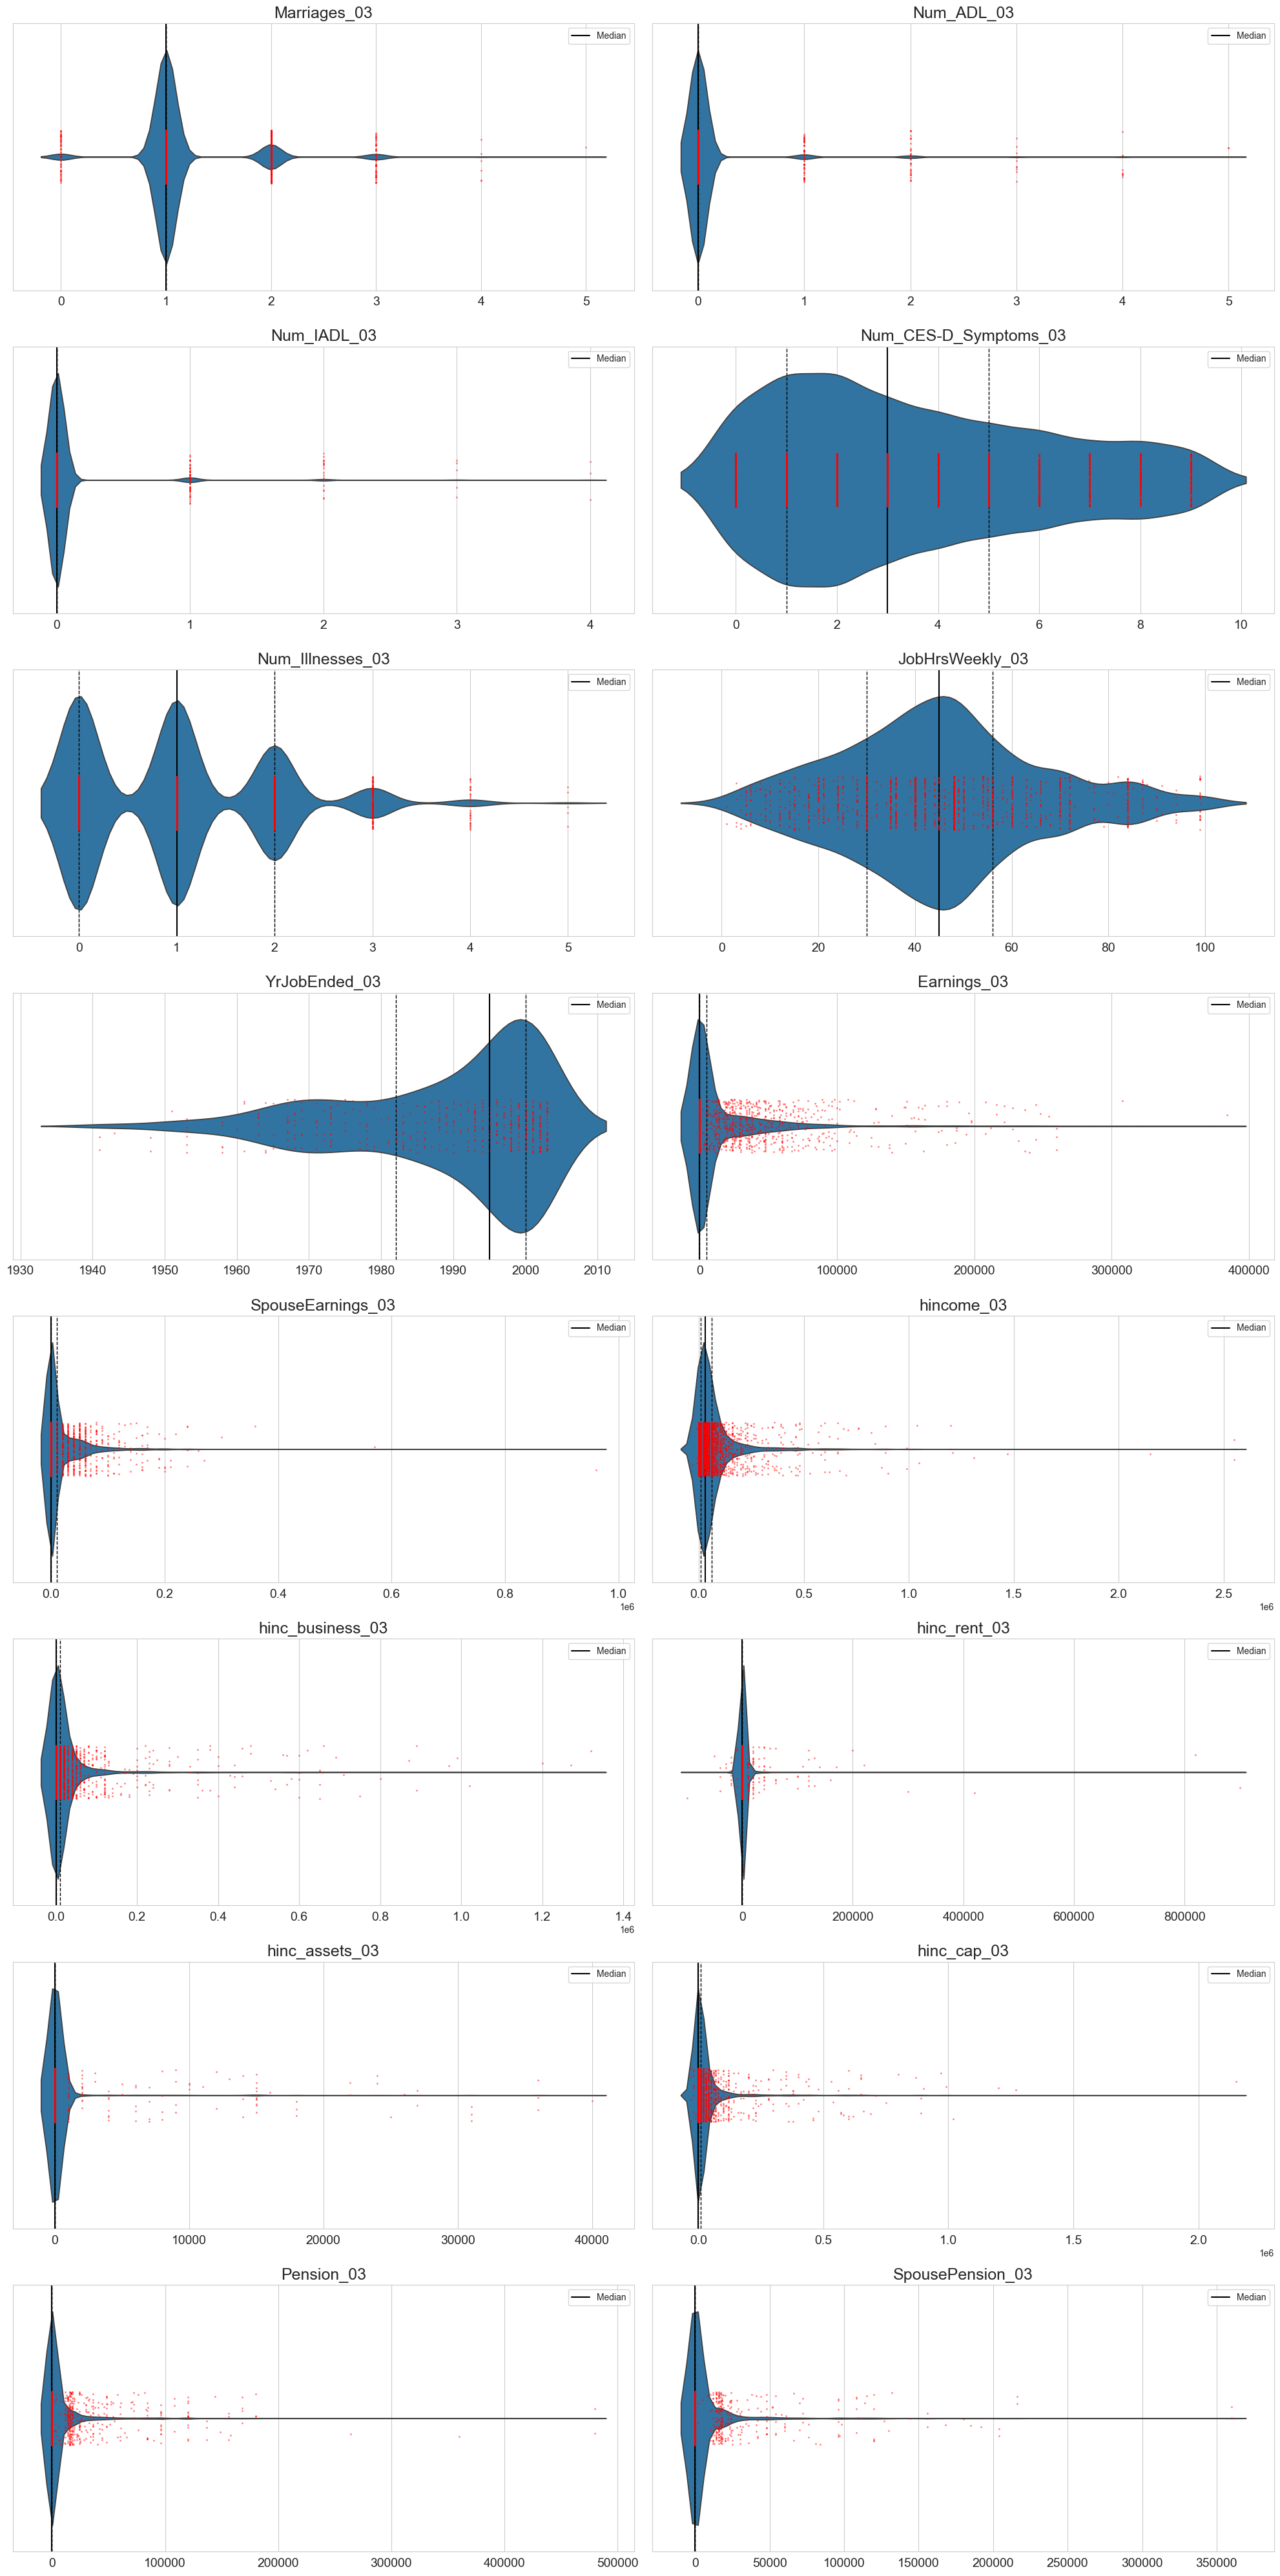

In [21]:
num_cols_03 = df[cols_03].select_dtypes(include=['number']).columns.to_list()
# df[num_cols_03].hist(bins = 30, figsize = (20, 20), color = 'b');

#### Plot Histogram and Violin ####
plot_hist_grid(df, num_cols_03, bins=30, n_cols=4, figsize_per_plot=(5, 4), 
               title_fontsize=14, xlabel_fontsize=11, ylabel_fontsize=11, tick_fontsize=9
              )

plot_violin_grid(df, 
                 numeric_cols=num_cols_03, n_cols=2, figsize_per_plot=(10, 5), 
                 title_fontsize=18, tick_fontsize=14, show_outliers=True
                )

##### - Numerical Features in columns with suffix `_12`


Plotting histograms...Total plots: 18



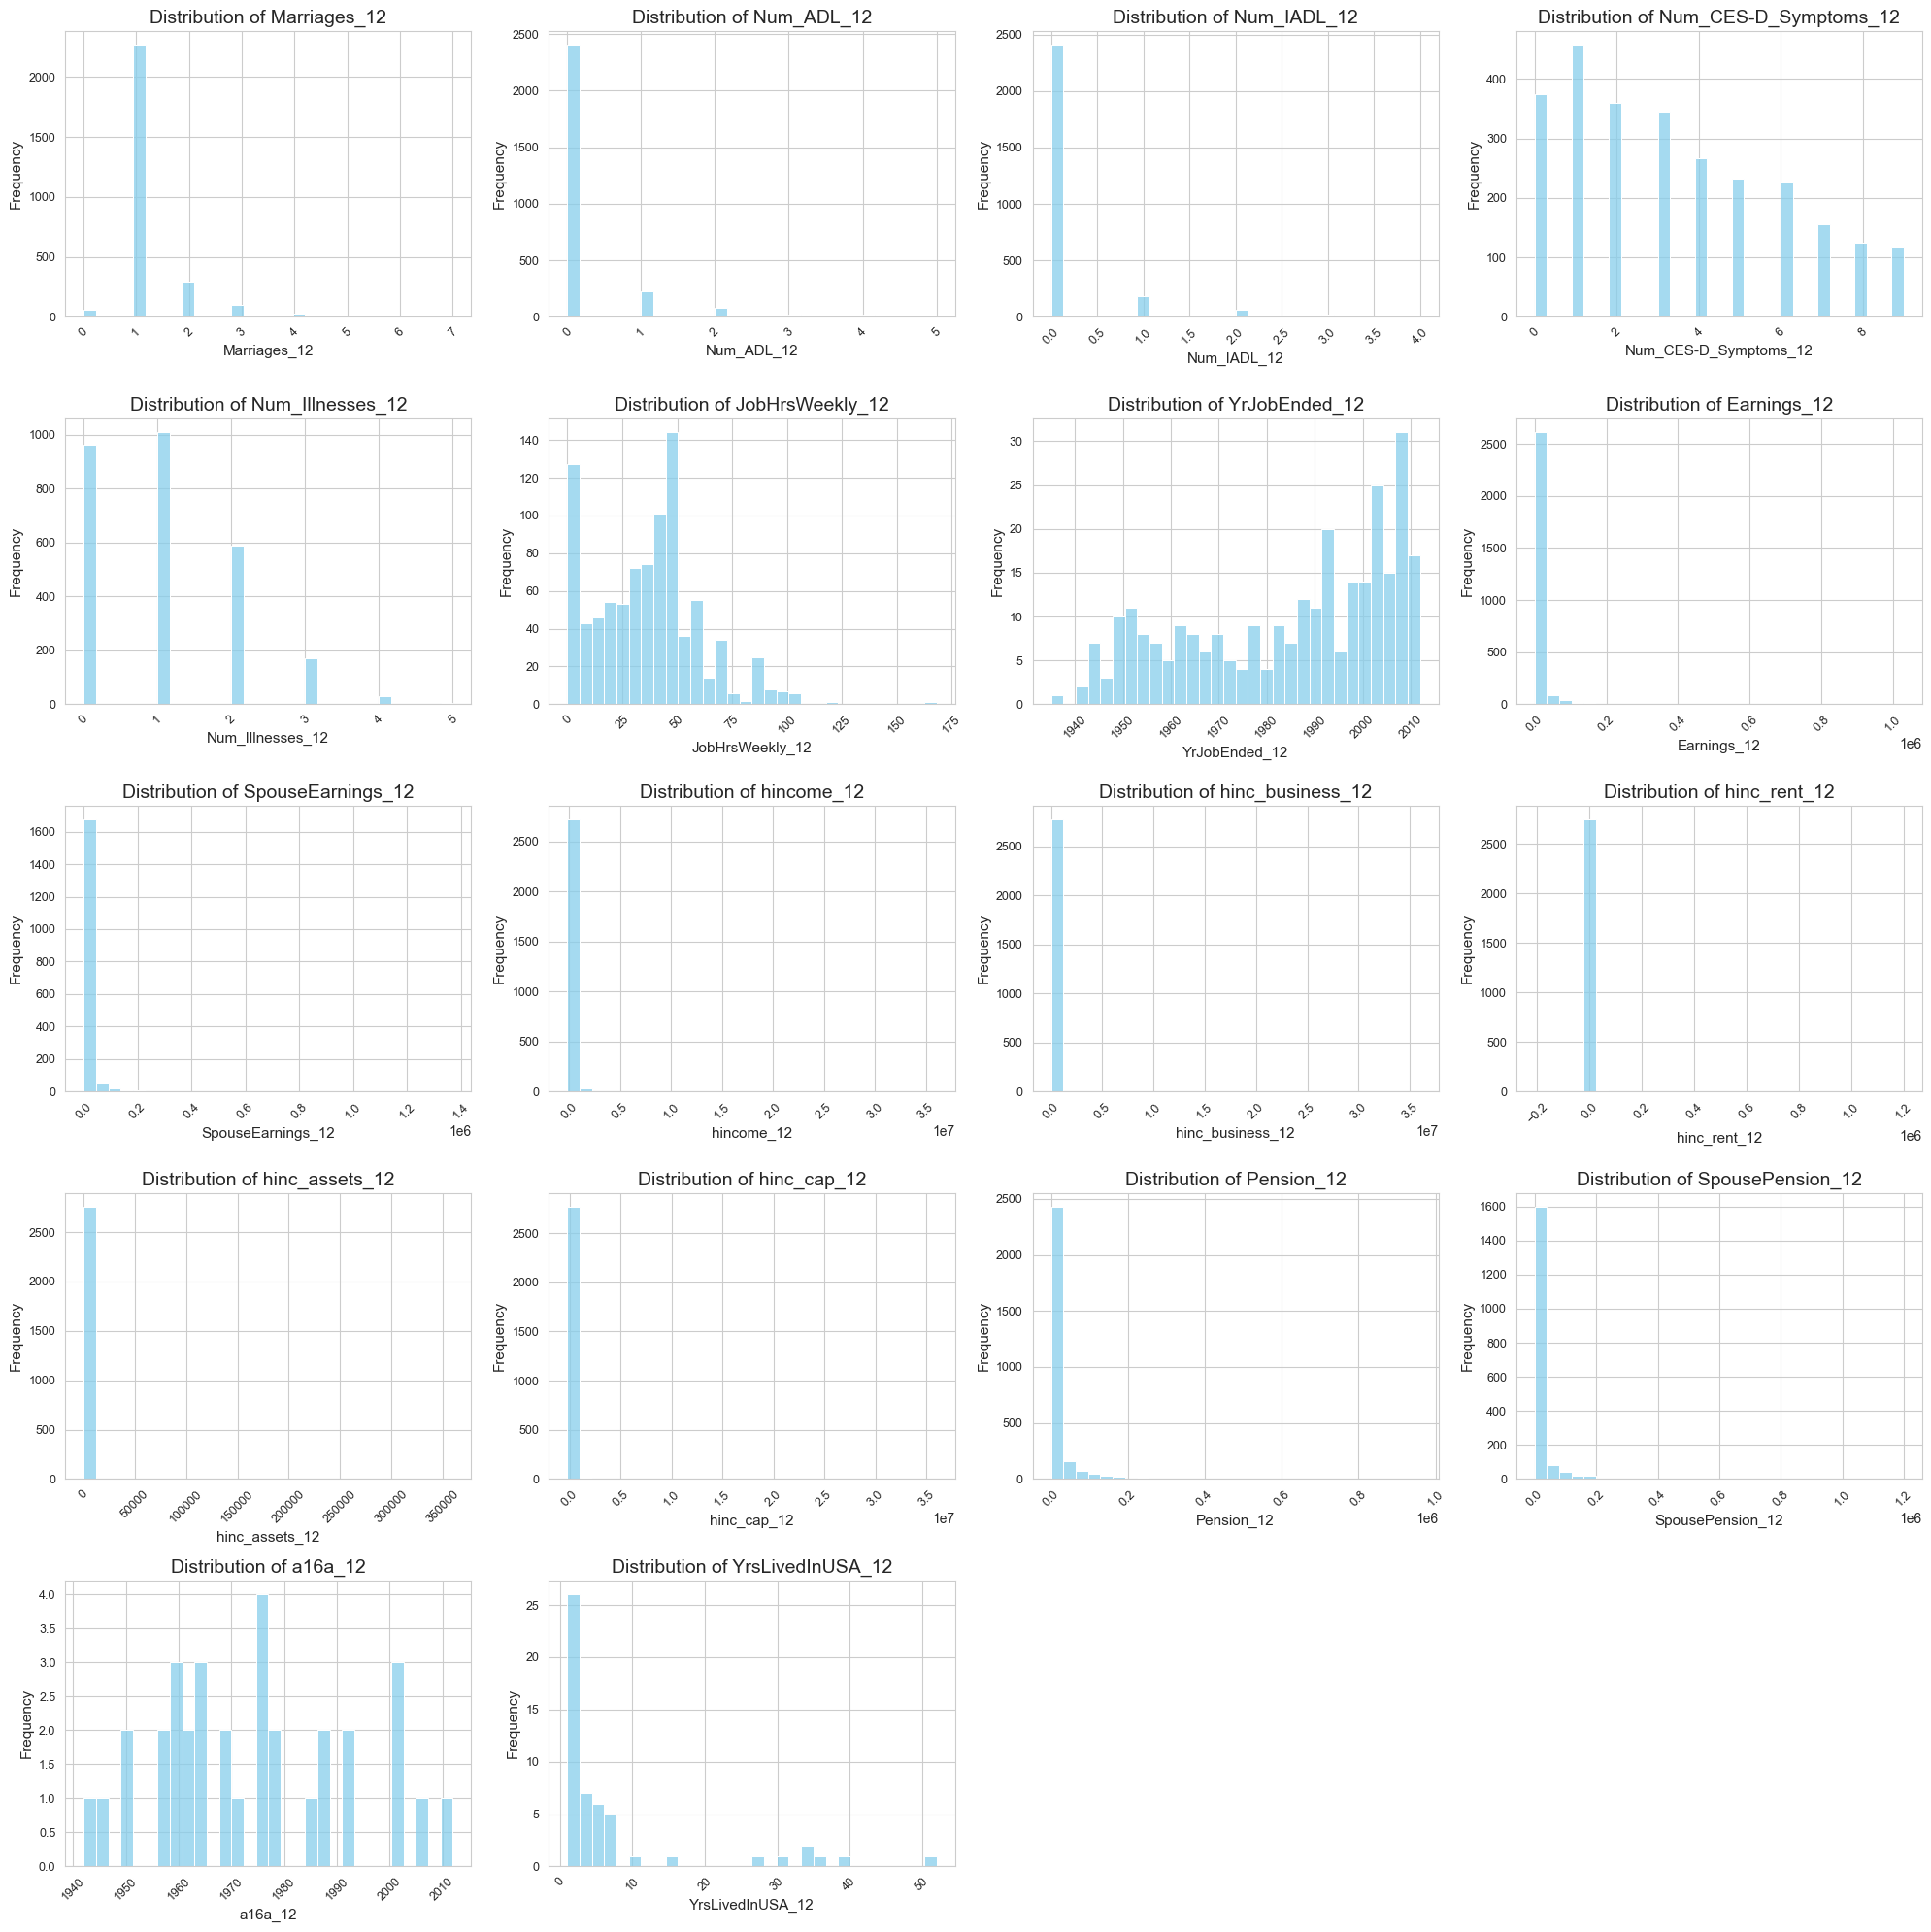


Plotting Violin Plots...Number of Plots: 18



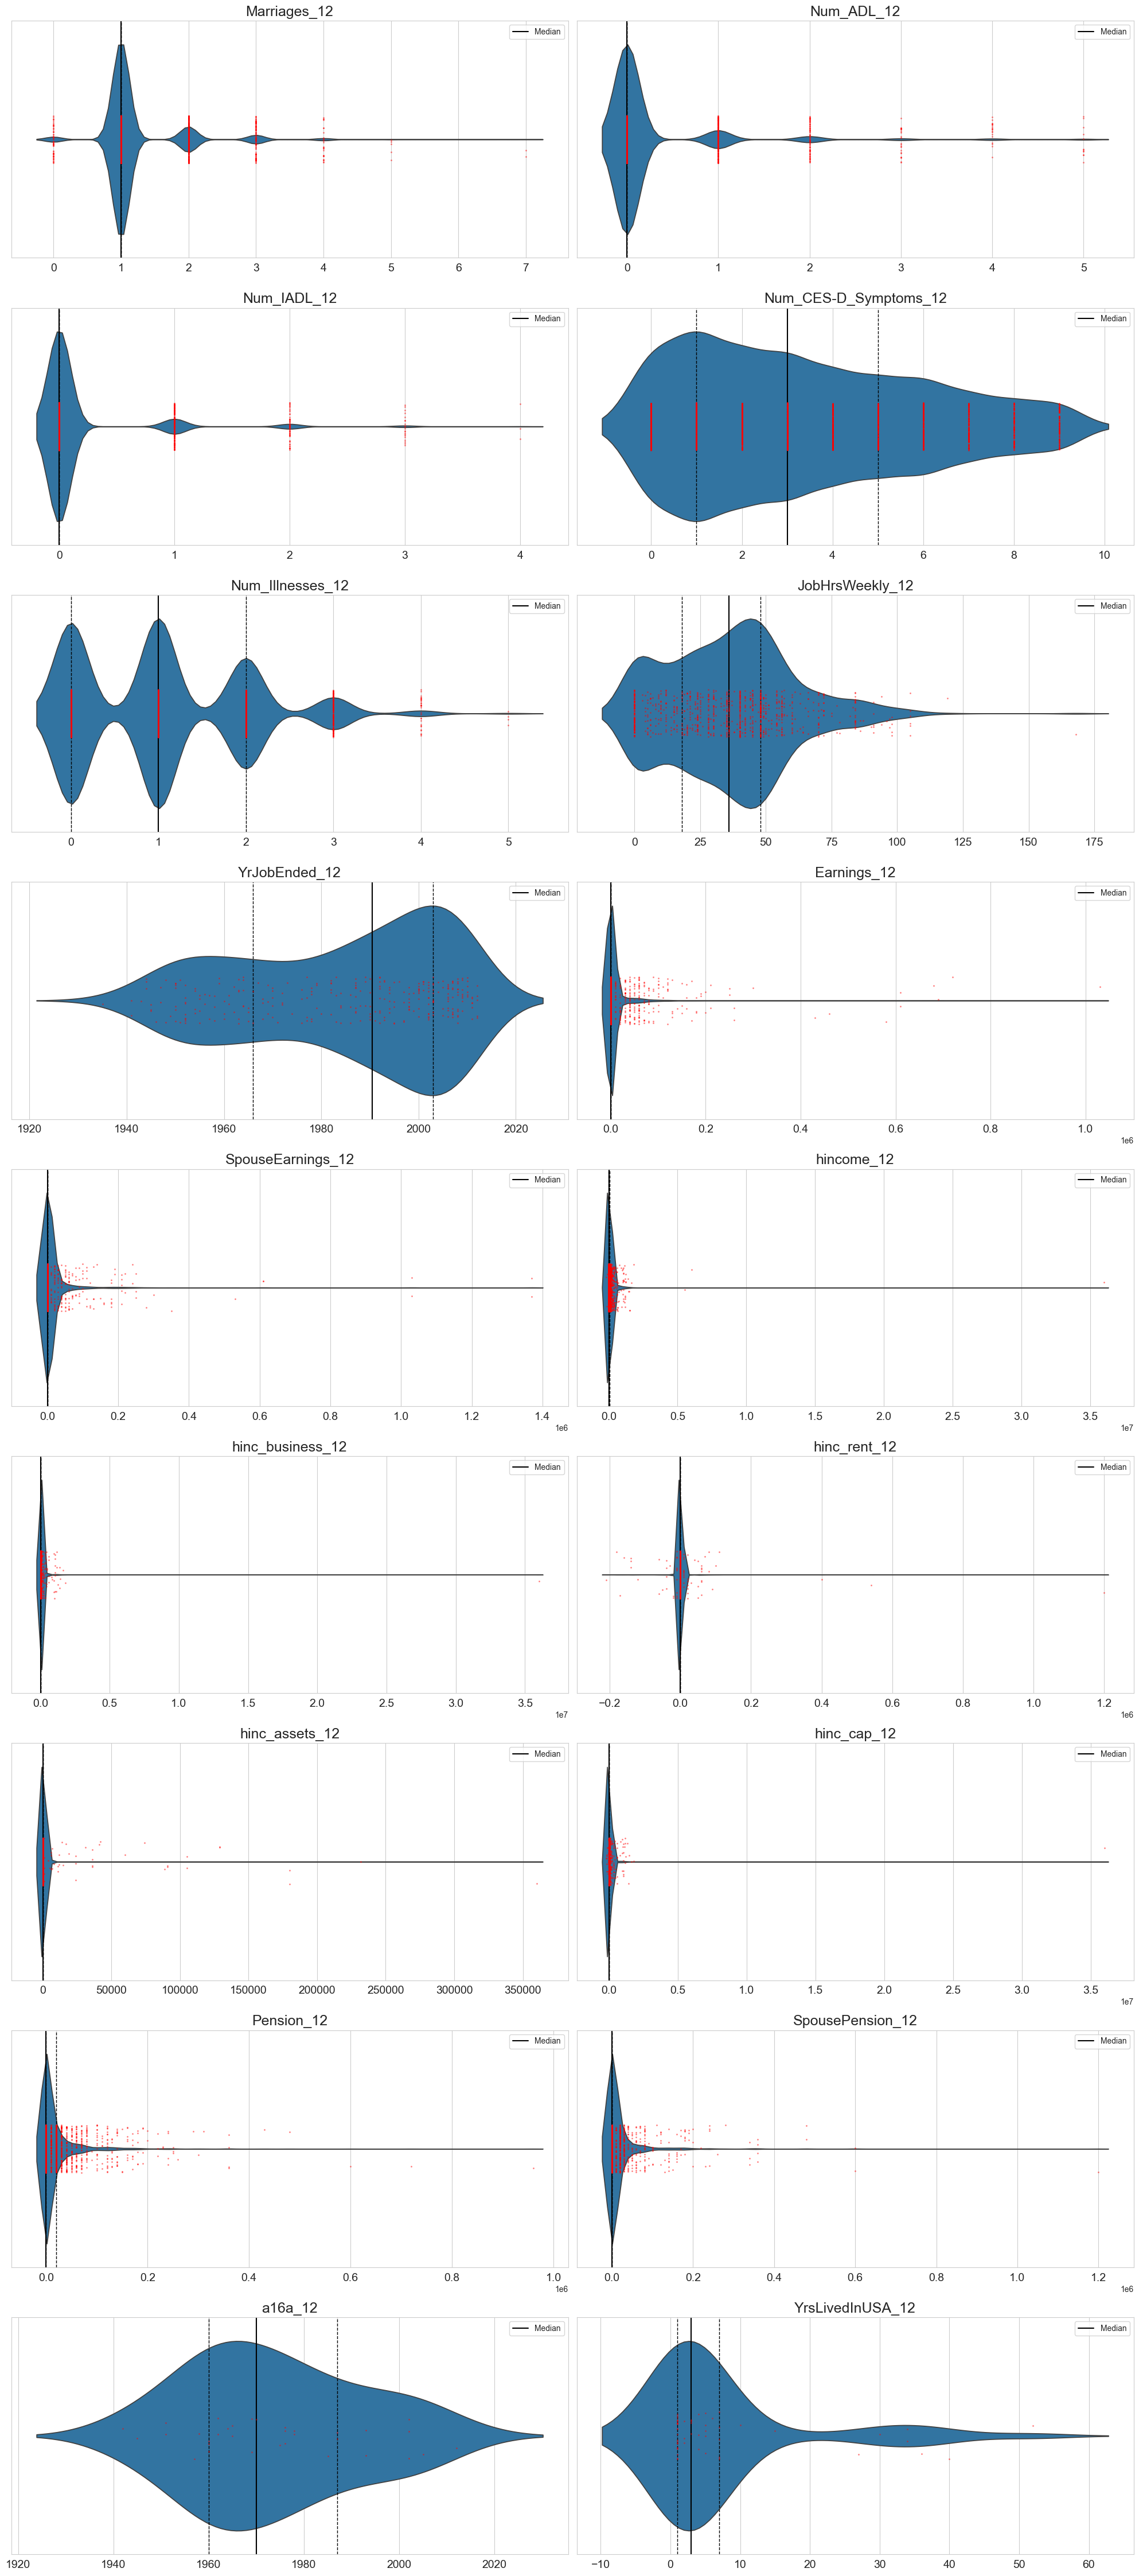

In [22]:
num_cols_12 = df[cols_12].select_dtypes(include=['number']).columns.to_list()
# df[num_cols_12].hist(bins = 30, figsize = (20, 20), color = 'r');

#### Plot Histogram and Violin ####
plot_hist_grid(df, num_cols_12, bins=30, n_cols=4, figsize_per_plot=(5, 4), 
               title_fontsize=14, xlabel_fontsize=11, ylabel_fontsize=11, tick_fontsize=9
              )

plot_violin_grid(df, 
                 numeric_cols=num_cols_12, n_cols=2, figsize_per_plot=(10, 5), 
                 title_fontsize=18, tick_fontsize=14, show_outliers=True
                )

#### Numerical features in rest of the columns

Numberical Features in rest of the columns: ['composite_score', 'PredictionYear']

--- Plotting Categorical Distributions ---
Input columns: ['PredictionYear'], Number of Cols: 1


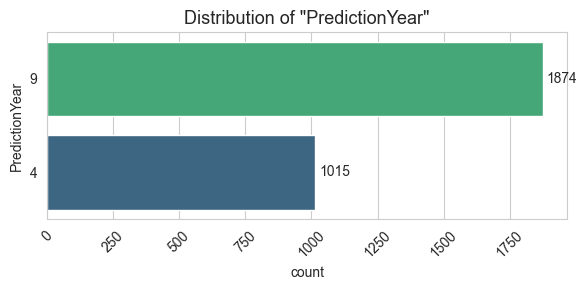

In [23]:
# Get the Numerical columns besides columns with suffix  `_03` and `_12`
num_cols_rest = df[cols_rest].select_dtypes(include=['number']).columns.to_list()
print(f"Numberical Features in rest of the columns: {num_cols_rest}\n")

# print("Plotting `PredictionYear`")
# mu = df['PredictionYear'].mean() # mean of distribution
# sigma = df['PredictionYear'].std() # standard deviation of distribution
# num_bins = 40
# df['PredictionYear'].plot.hist(bins = 50, alpha = 0.5, color = 'r', figsize = (6, 3))
# plt.ylabel('Num of Values')
# plt.xlabel('PredictionYear')
# plt.title('Histogram: mean = ' + str(round(mu, 4)) + ', sigma = ' + str(round(sigma, 4)))
# plt.grid()
# plt.show()

### Or We can treat this column as categorical as well since it has only two distinct values
# plot_categorical_distributions_plotly(df, ['PredictionYear'], width=600, height=300)

plot_categorical_distributions_seaborn(df, ['PredictionYear'], figsize = (6, 3))

#### Target variable analysis

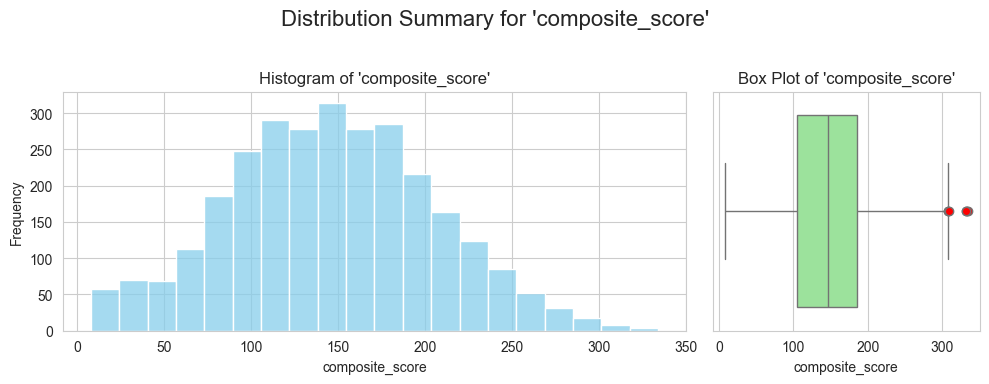

In [24]:
# plot_numeric_distribution_plotly(df, 'composite_score')
# plot_box_plotly(df, 'composite_score')

# # --- Plot | Plotly ---
# plot_histogram_and_boxplot(df, 'composite_score')

# --- Plot | SNS
plot_histogram_and_boxplot_sns(df, 'composite_score', figsize = (10, 4))

##### Examine Missing values

***********************
Missing Values:
***********************


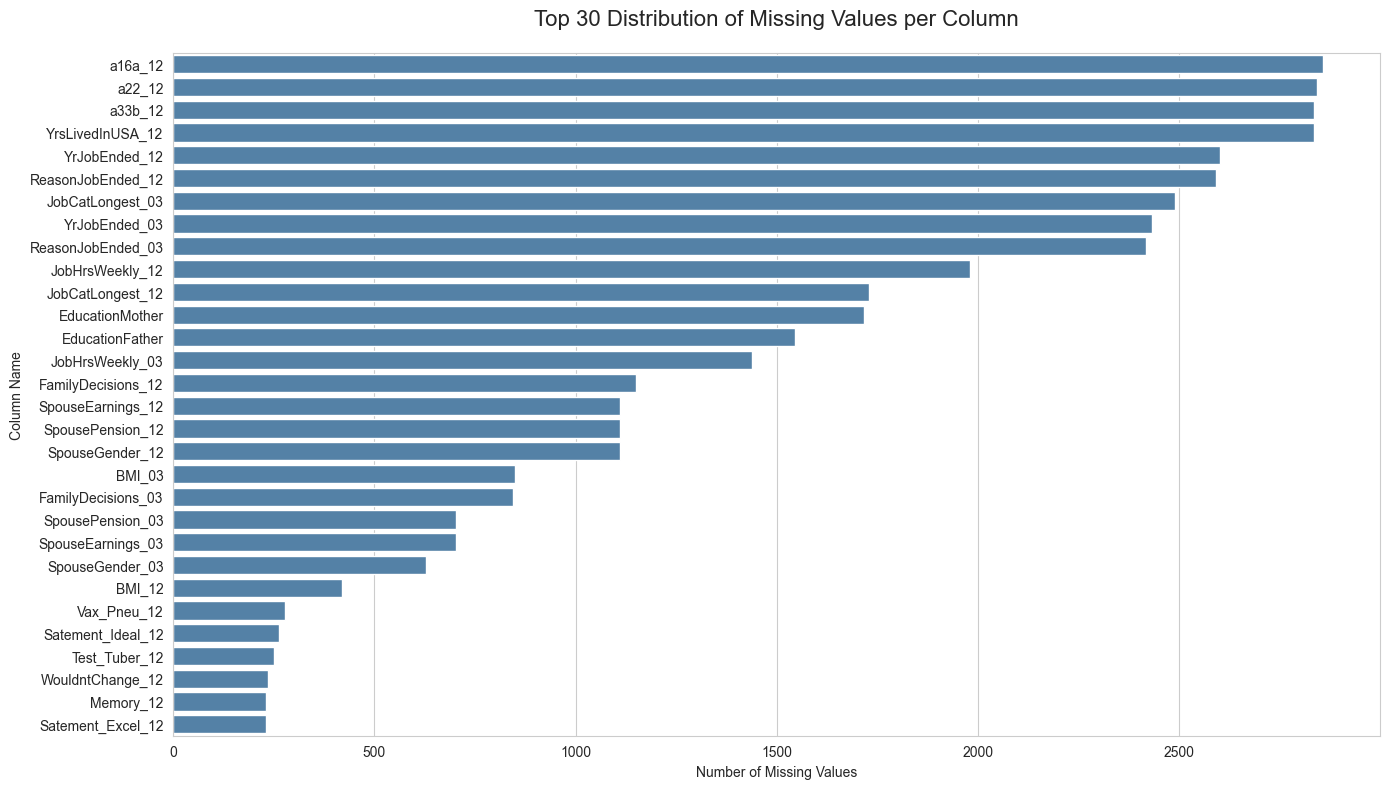

Total Missing Values: 60409

*****************************************
Percentage of Missing Values per Feature:
*****************************************


%age of Missing Values
UID                                  0.000000
Year                                 0.000000
composite_score                      0.000000
Age_03                               0.069228
Urban_03                             0.000000
...                                       ...
a22_12                              98.407754
a33b_12                             98.165455
SpeaksEnglish_12                     7.268951
HousingEnvironment_12                3.080651
PredictionYear                       0.000000

[185 rows x 1 columns]

*******************************************
Features with More than 40% Missing Values:
*******************************************


%age of Missing Values
EducationMother                 59.432330
EducationFather                 53.478712
JobHrsWeekly_03                 49.775009
JobCatLongest_03                86.154379
YrJobEnded_03                   84.215992
ReasonJobEnded_03               83.696781
JobHrsWeekly_12                 68.535826
JobCatLongest_12                59.813084
YrJobEnded_12                   90.031153
ReasonJobEnded_12               89.685012
a16a_12                         98.857736
YrsLivedInUSA_12                98.165455
a22_12                          98.407754
a33b_12                         98.165455

*******************************************
Features with less than 40% Missing Values:
*******************************************


%age of Missing Values
Age_03                                    0.069228
Marriages_03                              0.969193
Education_03                              0.484597
Num_Living_Child_03                       0.588439
Migration_03                              0.069228
...                                            ...
Meet_FnF_12                               7.407407
SocialActivities_12                       7.165109
AttendReligiousServices_12                7.234337
SpeaksEnglish_12                          7.268951
HousingEnvironment_12                     3.080651

[149 rows x 1 columns]

In [25]:
print("*" * 23)
print("Missing Values:")
print("*" * 23)
# # --- Plot | Plotly ---
# plot_missing_value_distribution(df)

# --- Plot | SNS
# Only Top N columns will be displayed
plot_missing_value_distribution_sns(df, top_n=30, figsize = (14, 8))


total_missing = df.isnull().sum().sum()
print(f"Total Missing Values: {total_missing}\n")
missing_percentage = pd.DataFrame(df.isnull().sum() * 100 / len(df), columns=["%age of Missing Values"])

print("*" * 41)
print("Percentage of Missing Values per Feature:")
print("*" * 41)
display(missing_percentage)

print("*" * 43)
print("Features with More than 40% Missing Values:")
print("*" * 43)

display(missing_percentage[missing_percentage["%age of Missing Values"] > 40])


print("*" * 43)
print("Features with less than 40% Missing Values:")
print("*" * 43)
missing_percentage[(missing_percentage["%age of Missing Values"] > 0) & (missing_percentage["%age of Missing Values"] < 40)]

#### Data Preparation

##### - Dropping Features

- Drop Columns

In [26]:
# # These are rudundant features
# COLS_TO_DROP = ['UID', 'imss_03', 'imss_12', 'issste_03', 'issste_12', 'pem_def_mar_03', 'pem_def_mar_12',
#                    'insur_private_03', 'insur_private_12', 'insur_other_03', 'insur_other_12', 'seg_pop_12',
#                    'Tired_03', 'Tired_12', 'Happy_03', 'Happy_12']

# print(f"Redundant Features: {COLS_TO_DROP}")
# print(f"Number of Redundant Features: {len(COLS_TO_DROP)}\n")

# # We will Drop Features which have more than 70% missing values
# na_cols_to_drop = missing_percentage[missing_percentage["%age of Missing Values"] >= 70]
# na_cols_to_drop = na_cols_to_drop.index.to_list()
# print(f"Features with more than 70% missing values: {na_cols_to_drop}")
# print(f"Number of eatures with more than 70% missing values: {len(na_cols_to_drop)}\n")

# # Adding two columns
# COLS_TO_DROP.extend(na_cols_to_drop)

# print(f"Features to Drop: {COLS_TO_DROP}\n")
# print(f"Number of Features to Drop: {len(COLS_TO_DROP)}\n")

# # Now Dropping Features
# columns_actually_dropped = []
# for col in COLS_TO_DROP:
#     if col in df.columns:
#         df = df.drop(col, axis=1)
#         columns_actually_dropped.append(col)
#     else:
#         print(f"Warning: Column '{col}' not found in DataFrame. Skipping.")

# # Checking 
# check_lists = lambda COLS_TO_DROP, columns_actually_dropped: sorted(COLS_TO_DROP) == sorted(columns_actually_dropped)
# print("*" * 31)
# print("Features Dropped | Successfully" if check_lists(COLS_TO_DROP, columns_actually_dropped) else "Features Dropped | UnSuccessfull")
# print("*" * 31)

In [27]:
# These are rudundant features
COLS_TO_DROP = ['UID', 'imss_03', 'imss_12', 'issste_03', 'issste_12', 'pem_def_mar_03', 'pem_def_mar_12',
                   'insur_private_03', 'insur_private_12', 'insur_other_03', 'insur_other_12', 'seg_pop_12',
                   'Tired_03', 'Tired_12', 'Happy_03', 'Happy_12']

dropColumns = Pipeline([
    ('drop_columns', ColumnDropper(columns_to_drop=COLS_TO_DROP)),
])
print("*" * 80)
print(f"PipeLine | Drop Columns: {dropColumns}")
print("*" * 80)

# --- Applying Pipeline | Drop Columns ---
print("*" * 40)
print("--- Applying Pipeline | Drop Columns ---")
print("*" * 40)
df = dropColumns.fit_transform(df)

********************************************************************************
PipeLine | Drop Columns: Pipeline(steps=[('drop_columns',
                 ColumnDropper(columns_to_drop=['UID', 'imss_03', 'imss_12',
                                                'issste_03', 'issste_12',
                                                'pem_def_mar_03',
                                                'pem_def_mar_12',
                                                'insur_private_03',
                                                'insur_private_12',
                                                'insur_other_03',
                                                'insur_other_12', 'seg_pop_12',
                                                'Tired_03', 'Tired_12',
                                                'Happy_03', 'Happy_12']))])
********************************************************************************
****************************************
--- Applying Pipeline | Dr

- Drop Columns with High Missing Values

In [28]:
dropColumnsHighNA = Pipeline([
    ('drop_columns_high_na', DropColumnsHighNA(threshold=70.0)),
])
print("*" * 80)
print(f"PipeLine | Drop Columns With High Missing Values: {dropColumnsHighNA}")
print("*" * 80)

# --- Applying Pipeline | Drop Columns With High Missing Values ---
print("*" * 65)
print("--- Applying Pipeline | Drop Columns With High Missing Values ---")
print("*" * 65)
df = dropColumnsHighNA.fit_transform(df)

********************************************************************************
PipeLine | Drop Columns With High Missing Values: Pipeline(steps=[('drop_columns_high_na', DropColumnsHighNA())])
********************************************************************************
*****************************************************************
--- Applying Pipeline | Drop Columns With High Missing Values ---
*****************************************************************
DropColumnsHighNA: Dropped columns: ['JobCatLongest_03', 'YrJobEnded_03', 'ReasonJobEnded_03', 'YrJobEnded_12', 'ReasonJobEnded_12', 'a16a_12', 'YrsLivedInUSA_12', 'a22_12', 'a33b_12']


- Impute Missing Values

In [29]:
# Impute using median for numerics, and mode for categoricals
# df_train_cleaned = impute_missing_values(df, num_strategy="median", cat_strategy="mode")
# Use mean for numerics, and fill categorical with a custom label e.g. `missing`
# df_clean = impute_missing_values(df, num_strategy="mean", cat_strategy="missing")

In [30]:
missingValueImputer = Pipeline([
    ('missing_value_imputer', MissingValueImputer(num_strategy="median", cat_strategy="mode")),
])
print("*" * 100)
print(f"PipeLine | Impute Missing Values: {missingValueImputer}")
print("*" * 100)

# --- Applying Pipeline | Impute Missing Values ---
print("*" * 50)
print("--- Applying Pipeline | Impute Missing Values ---")
print("*" * 50)
df = missingValueImputer.fit_transform(df)

****************************************************************************************************
PipeLine | Impute Missing Values: Pipeline(steps=[('missing_value_imputer', MissingValueImputer())])
****************************************************************************************************
**************************************************
--- Applying Pipeline | Impute Missing Values ---
**************************************************
MissingValueImputer: Fitted. Numerical imputers: {'composite_score': None, 'Marriages_03': 1.0, 'Num_ADL_03': 0.0, 'Num_IADL_03': 0.0, 'Num_CES-D_Symptoms_03': 3.0, 'Num_Illnesses_03': 1.0, 'Marriages_12': 1.0, 'Num_ADL_12': 0.0, 'Num_IADL_12': 0.0, 'Num_CES-D_Symptoms_12': 3.0, 'Num_Illnesses_12': 1.0, 'JobHrsWeekly_03': 45.0, 'Earnings_03': 0.0, 'SpouseEarnings_03': 0.0, 'hincome_03': 30000.0, 'hinc_business_03': 0.0, 'hinc_rent_03': 0.0, 'hinc_assets_03': 0.0, 'hinc_cap_03': 0.0, 'Pension_03': 0.0, 'SpousePension_03': 0.0, 'JobHrsWeekly

#### Save to .CSV

In [31]:
# df.to_csv(path_train_cleaned, index=False, encoding="utf8")
# print(f"Path to Save Cleaned File: {path_train_cleaned}")